2D Plots
========

This chapter covers various types and styles of two-dimensional (2D)
plots in gnuplot. A 2D plot is a visual description of the relationship
between two variables, whether that relationship is described by a
mathematical function or a set of data. As in future chapters, we’ll
start with simple examples and gradually get more complex, showing,
along the way, how to customize the graphs’ appearance and the
information that appears on it. As new commands or syntax elements are
introduced, we’ll highlight those elements in the code listings to make
it easy for the eye to pick out the new material. We’ll do this in a way
that doesn’t affect your ability to copy-and-paste the code to get a
working gnuplot script, ready to be adapted to your application.

You can try out these scripts in two ways: you can save each script to a
file, and tell gnuplot to execute it, or you can paste the script into
the interactive prompt. The latter way may be better for experimenting
and learning the system, but each way comes with its own caveat. If you
are saving the scripts to files, you can run them by typing
`gnuplot file`, substituting the name of the file for `file`. If you do
this, however, you may not see any output, or get a brief glimpse of
your plot before it vanishes. This is because the plot window for most
on-screen “terminals”, as gnuplot calls its output devices, goes away
when the gnuplot process exits. To prevent this, invoke the program with
`gnuplot --persist file`. The caveat that applies to using the
interactive prompt is this: some of the lines of code in our examples
change various settings. These changes will persist in your session, but
each script is intended to be self-contained. Therefore it’s probably
best to give the command `reset` before starting a new example; this
will wipe out any settings (well, most of them) that you’ve altered, and
is (mostly) equivalent to ending the session (with `ctrl-D` on Linux and
other Unix-like systems) and starting another one.

Another, and quite wonderful, way to interact with gnuplot has recently
appeared: a [gnuplot kernel](https://github.com/has2k1/gnuplot_kernel)
for the [Jupyter notebook](https://jupyter.org/). This provides a
browser-based interface to gnuplot that is very convenient for
exploration and notekeeping.

Plotting a Function
-------------------

Here’s a mathematical function that you’ve probably seen before. Gnuplot
knows quite a lot of math, so we can just say its name to get a graph:

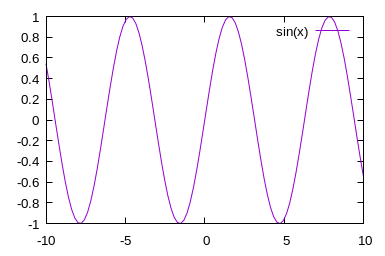

In [1]:
plot sin(x)

Setting Ranges
--------------

That was simple. Notice how gnuplot decided to plot our function from
-10 to +10. That’s the default, which we got because we didn’t ask for
any particular range. Gnuplot also set the y-axis limits (the range of
the vertical axis) to encompass the range of the function over that
default x-axis domain. Let’s take control of the limits on the
horizontal axis (the new command is highlighted). Gnuplot happens to
know what π is (but doesn’t know any other transcendental numbers).

In [ ]:
set xrange [-pi : pi]
plot sin(x)

You may want to set the range of the vertical axis as well, either to
show only a part of the function or data, or to leave extra room on the
graph.

In [ ]:
set xrange [-pi : pi]
set yrange [-2 : 2]
plot sin(x)

Changing the Linewidth
----------------------

The default styles chosen by gnuplot are not ideal. Fortunately, we can
change everything, and make gnuplot’s output look any way we want. We’ll
defer changing the styles of labels, including tic labels, to a later
chapter. But for now, let’s make the plot curves a bit thicker. The
`set lw` command set the **linewidth**; the parameter is the multiple of
the default width for the terminal in use.

In [ ]:
set xrange [-pi : pi]
plot sin(x) lw 3

Positioning the Key
-------------------

Notice how the automatically generated legend, or what gnuplot calls the
“key”, also displays the same styling details we give to the curves.
And, speaking of the key, now that we’ve reverted to using the entire
plot height, notice how the curve collides with it. Gnuplot positions
some things automatically, but the key is not one of them. Gnuplot
provides several ways to position the key. Here’s the simplest:

In [ ]:
set xrange [-pi : pi]
set key bottom right
plot sin(x) lw 3

You can probably guess what you get with various combinations of
`bottom`, `left`, `right`, and `top`. If you need finer control over
positioning, you can refer to one of gnuplot’s coordinate systems (as in
all the code examples, the new commands are highlighted):

In [ ]:
set xrange [-pi : pi]
set key at graph 0.3, 0.6
plot sin(x) lw 3

The phrase `at graph 0.3, 0.6` positions the key at location x = 0.3 and
y = 0.6 in graph coordinates, which is a coordinate system where (0,0)
is at the bottom left of the actual graph (not the screen on which the
graph is drawn). Say `help coordinate` to invoke gnuplot’s help system
and get a rundown of the *five* coordinate systems available to you.

Defining a Graph Title
----------------------

In a later chapter we’ll find out how to [style the text](#text-styling)
used in the key and elsewhere. For now, here is how to add a title to
the graph:

In [ ]:
set xrange [-pi : pi]
set key at graph 0.3, 0.6
set title "Sine Wave"
plot sin(x) lw 3

Titling Individual Curves
-------------------------

You can use Unicode characters in your titles, and anywhere you specify
text. We often want to supply individual curves with titles as well:

In [ ]:
set xrange [-pi : pi]
set key at graph 0.3, 0.6
set title "Sine Wave"
plot sin(x) lw 3 title "Sine of x"

Grid Lines
----------

To apply a grid to your graph, use the new command given below. The
gridlines will, by default, extend the major axes tics; in a later
chapter we’ll learn how to get total control over our tics.

In [ ]:
set xrange [-pi : pi]
set key at graph 0.3, 0.6
set title "Sine Wave"
set grid
plot sin(x) lw 3 title "Sine of x"

The gridlines can be styled just as the plotted curves can. In fact,
depending on your terminal, the gridlines may be so faint as to be
almost impossible to see until you apply some styling to make them more
visible. To make it easier to style lines and curves, it’s time to
introduce the concept of the “linetype” in gnuplot. Each terminal has a
set of predefined linetypes (abbreviated `lt`). To see what they are,
and to test some of the other capabilities of the terminal you’re using,
just enter this command:

In [ ]:
test

Linetypes
---------

Let’s say that you want solid gridlines. Referring to the test plot we
just made, you can see that the solid line is linetype 1 (it may be
something different on your terminal). Here is how we get a grid with
solid, green gridlines:

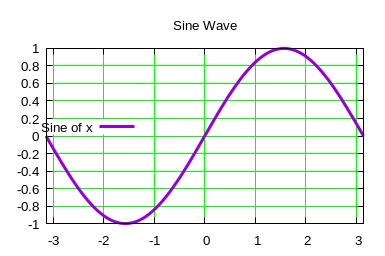

In [2]:
set xrange [-pi : pi]
set key at graph 0.3, 0.6
set title "Sine Wave"
set grid lt 1 lc rgb "green"
plot sin(x) lw 3 title "Sine of x"

Plotting Multiple Curves
------------------------

To see the list of color names that gnuplot accepts, just type
`show colors` at the prompt. To plot more than one curve on a graph,
just separate the functions (or data files, which we’ll see later in
this chapter) by commas, and gnuplot will plot them in a sequence of
colors, putting them on the key so you can identify them.
`plotting-multiple-curves`

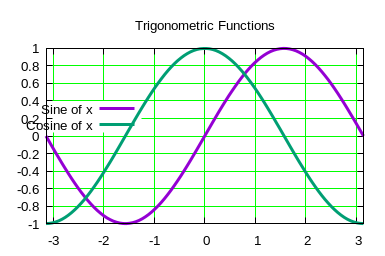

In [3]:
set xrange [-pi : pi]
set key at graph 0.3, 0.7
set title "Trigonometric Functions"
set grid lt 1 lc rgb "green"
plot sin(x) lw 3 title "Sine of x", cos(x) lw 3\
   title "Cosine of x"

Monochrome
----------

When preparing a paper for publication, you may have to create black and
white renditions of your graphs for the print version. The script here
shows the command you need; as you can see, gnuplot substitutes a
sequence of dash styles in place of a sequence of colors.

In [ ]:
set monochrome
set xrange [-pi : pi]
set key at graph 0.3, 0.7
set title "Trigonometric Functions"
set grid 
plot sin(x) lw 3 title "Sine of x", cos(x) lw 3\
   title "Cosine of x"

Creating and Plotting Data Files
--------------------------------

Of course, gnuplot can plot data from files (and other sources, too, as
we’ll see in subsequent chapters) as well as mathematical functions. In
order to experiment with this, we’ll need at least one data file. You
could make it by hand with a text editor or write a program in your
favorite language to generate some data, or use some that you have
available. But gnuplot can make data files itself. To make a file with
data that forms a parabola, execute the following script. We’ve included
comments (they begin with the “\#” character; everything after this
character is ignored by gnuplot) to explain what the new commands do.

In [ ]:
set table "parabola.dat" # Save numbers to a file.
plot -x**2
unset table # Go back to normal plotting.
plot sin(x) lw 3 title "Sine of x", \
   "parabola.dat" title "Parabola data"

After executing the previous script you should have a file called
“parabola.dat” in the directory in which you started gnuplot. Keep it
around so we can use it with later examples. It will serve, also, as a
convenient reference for the format that gnuplot expects when plotting
data files. In the last line, after our familiar sine curve, we’ve
plotted the numbers read from the file given inside quotation marks.
This final line also shows how we can break long lines in scripts into
two by using a backslash. Gnuplot has chosen markers, rather than a
continuous line, to help indicate that we’re looking at data, but we can
change this.

Using a Second y-axis
---------------------

First, however, notice how the sine curve is squashed, due to the larger
range on the y-axis required to include the data from the file. We can
fix that by plotting each curve against its own y-axis:

In [ ]:
set y2tics -100, 20
set ytics nomirror
plot sin(x) axis x1y1 lw 3 title "Sine of x" , \
   "parabola.dat" axis x1y2 title "Parabola data"

Gnuplot can have two different y-axes and two different x-axes. In order
to define a second y-axis, use the `y2tics` command; the first parameter
is the starting value at the bottom of the graph, and the second is the
interval between tics on the axis. The second line tells gnuplot to use
a different axis on the right-hand side, rather than simply *mirroring*
the left-hand y-axis. The final plot command is the same as the ones
we’ve seen before, with the addition of the “axis” commands; these tell
gnuplot which set of axes to use for which curve.

Notice how the previous graph doesn’t really have room for the key
anywhere inside it. One way to handle this is to put the key outside:

In [ ]:
set key bottom left outside
plot sin(x) axis x1y1 lw 3 title "Sine of x" , \
    "parabola.dat" axis x1y2 title "Parabola data"

Multiplot
---------

There is another way to get multiple plots on one graph, one that is
ultimately more flexible. We’ll explore the full capabilities of
`multiplot` in a later chapter. For now, here is a simple example of how
to use it to put two curves on a single graph, with each curve using its
own settings. If you enter the commands one at a time at the terminal,
notice how the prompt changes from **\>gnuplot** to **\>multiplot**
after the `set multiplot` command is entered. To clear the graph and
start over, you can enter another `multiplot` command.

In [ ]:
set multiplot
set xrange [-2*pi : 2*pi]
plot sin(x) lt 2 lw 4
set x2range [-6*pi : 6*pi]
plot sin(x) lt 3 lw 4 axis x2y1

Sampling Frequency
------------------

Gnuplot plots functions by dividing the x-axis into a number of points
and evaluating the function at each point. These evaluation locations
are called “samples.” By default, gnuplot will use 100 samples.
Sometimes this is not enough, and sometimes it is too many for our
presentational strategy, as we’ll see shortly. You can change the number
of samples used with the `set samples` command. This will set the total
number of (equally-spaced) sampled used for all the plot commands until
you change it with another `set samples` command; but we can plot curves
using different numbers of samples on the same graph by using the
`multiplot` mode that we learned about in the previous example. When we
reduce the number of samples, first our graph gets a little bumpy. When
we reduce it too much, we see the effects of
*[aliasing](http://redwood.berkeley.edu/bruno/npb261/aliasing.pdf)*, and
other symptoms of undersampling. Here is an example showing the same
sine wave plotted twice. The two curves have different constants added
to them to shift them vertically so we can see them both clearly on a
single graph. Nothing else is changed except for the sampling frequency.

In [ ]:
set multiplot
set nokey
set yrange [-2 : 2]
set samples 800
plot sin(10*x)+1 lw 3 lt 1
set samples 100
plot sin(10*x)-1 lw 3 lt 2

The “with” Command
------------------

The three main styles for plotting functions or data are called `lines`,
`points` (used for the parabola data in the previous two examples) and
both together, called `linespoints`. The style can be chosen on the fly
using the `with` command, as in the following example:

In [ ]:
set key top left
set xrange [0 : 1]
plot x with lines, x**2 with points, x**3 with linespoints

[Above](#linetypes) we saw that the linetype can be selected from among
those displayed using the `test` command. As you can see, the output of
that command also displays examples of markers next to each sample line.
You can have open or closed circles, diamonds, triangles, etc., but
referring the `pointtype` (abbreviated `pt`). And just as you can set
the line width with `lw`, you can set the point size with `ps`. This
example, like all the others in this chapter, shows how to set styles on
the fly, individually for each curve. In a later chapter we’ll see how
to define reusable styles and set styling defaults, to save typing and
make our scripts easier to read. Gnuplot places a marker at each sample
point. We’ve reduced the sampling frequency to make room for the larger
markers.

In [ ]:
set samples 20
set key top left
set xrange [0 : 1]
plot x with lines lw 3, x**2 with points pt 6 ps 2,\
   x**3 with linespoints lw 3 pt 15 ps 3

Dashed Lines
------------

You might have noticed, as well, that the output of the `test` command
displays some dash patterns. You can set these as well, by specifying
the `dashtype`, which can be abbreviated `dt`.

In [ ]:
set key top left
set xrange [0 : 1]
plot x lw 3 dt 5, x**2 lw 4 dt 3,\
   x**3  lw 3 dt 2

In order to use the `dashtype` setting in the previous example, you need
to remember which type number is associated with which dash pattern, or
refer to the output of the `test` command. There is a simpler and more
pleasant way, however, which was recently added to gnuplot. You can
specify the dash pattern visually, as in this example:

In [ ]:
set key top left
set xrange [0 : 1]
plot x lw 3 dt "._", x**2 lw 4 dt "- -",\
   x**3  lw 3 dt "- . _"

The “set link” Command
----------------------

[Earlier](#using-a-second-y-axis) in this chapter we learned how to set
up a second y-axis so that two curves could be plotted together even
though they covered very different ranges. The y2 axis can have its own
range (set via `set y2range`) and its own tic spacing. Gnuplot also
allows the two y-axes, or the two x-axes, to be related by any
mathematical transformation. You do this by using the `set link`
command, which requires you to spell out the inverse transformation as
well:

In [ ]:
set key bottom right
set xrange [0 : 10]
set link y2 via y**2 inverse sqrt(y)
set ytics nomirror
set y2tics 0, 5
plot x lw 15, x**2 lw 4 axis x1y2

The previous example was designed to make it clear what the axis scaling
does. As you can see from the ticmarks on the y2 axis, the scale on that
axis is not linear, but is defined by the transformation in the
`set link` command. We’ve plotted a straight line (the function “x”) on
the y1 axis, using a very thick width, and the function $x^2$ on the y2
axis, using a thinner line. The scaling of the y2 axis undoes the
function, turning it into a straight line, which overlays the “real”
straight line.

If we turn on the grid, using the `set grid` command that we [learned
about above](#grid-lines), the grid will align with the y1 axis tics
(and the x-axis tics). If we want it to align with the scaled, y2 axis,
here’s what we do:

In [ ]:
set key bottom right
set xrange [0 : 10]
set link y2 via y**2 inverse sqrt(y)
set ytics nomirror
set y2tics 0, 5
set grid lw 2 lt 1 lc rgb "gray"
set grid noy y2
plot x lw 15, x**2 lw 4 axis x1y2

In the previous script, `y2` is actually an abbreviation for `y2tics`,
etc. We had to specify `noy` (short for `noytics`) to turn off the grid
for the first y-axis. Having them both on would lead to a confusing
mess. You can also have a grid that extends the ticmarks of just one
axis, by explicitly turning off the other one:

In [ ]:
set key bottom right
set xrange [0 : 10]
set link y2 via y**2 inverse sqrt(y)
set ytics nomirror
set y2tics 0, 5
set grid lw 2 lt 1 lc rgb "gray"
set grid  y2
set grid nox noy y2
plot x lw 15, x**2 lw 4 axis x1y2

One very useful application of grid linking is showing different units
on the same graph. Light can be talked about in terms of wavelength or
of photon energy; the two are related by $E = hc/λ$, where $E$ is the
energy, $h$ is Planck’s constant, and $λ$ is the wavelength. In the
linking formula in the script below, we’ve used a multiplier that let’s
us express $λ$ in microns and $E$ in eV (electron volts). The
highlighted line is the form of the `set xtics` command that sets in
interval between the tics, letting gnuplot choose the start and end
values automatically.

In [ ]:
set title\
 "Transmission vs. Energy (eV, top) and λ (μm, bottom)"
set xrange [5 : 10]
set xtics nomirror
set link x2 via 1.24/x inverse 1.24/x
set x2tics .02
set grid
plot exp(x) lw 4

Parametric Plots
----------------

Up to now we’ve seen plots of functions and data where there was an
explicit relationship between the x and y values. A more general class
of 2D curves is where the x and y values each depend on a third
variable, called a *parameter*. In gnuplot, the parameter is called “t”.
It has a default range, just as x does: \[-5 : 5\], and can be reset
with the `set trange` command. The following plot resembles a Lissajous
figure, which can be seen on an oscilloscope when sine waves of
different frequencies are plugged into the x and y axes.

In [ ]:
set samples 1000
set parametric
unset key
plot sin(7*t), cos(11*t)

Up to now the tic marks and labels have been placed around the outside
of the plot, at what gnuplot calls the “border”. This is not where the
actual axes are. Unless you turn them on, the axes are not drawn.

In [ ]:
set samples 1000
set parametric
unset key
set zeroaxis
plot sin(7*t), cos(11*t)

You can choose to show only one of the axes. Let’s try that while also
showing how to set the thickness of the axis line. Linetypes and colors
can be set as well.

In [ ]:
set samples 1000
set parametric
unset key
set yzeroaxis lw 4
plot sin(7*t), cos(11*t)

In the previous examples the ticmarks and their numerical labels stayed
on the border. We can move the x-tics, y-tics, or both to the axes.

In [ ]:
set samples 1000
set parametric
unset key
set zeroaxis lw 3
set xtics axis 
plot sin(7*t), cos(11*t)

Here we move all the tics to the axes and dispense with the border
entirely:

In [ ]:
set samples 1000
set parametric
unset key
set zeroaxis lw 3
unset border
set xtics axis 
set ytics axis 
plot sin(7*t), cos(11*t)

Controlling Your Borders
------------------------

You can have a partial border: on the top, left, or any combination.
Specify where by adding these numbers for the segments that you want,
and using the result as a parameter in the `set border` command:

    1      bottom      
    2      left        
    4      top         
    8      right       

`controlling-your-borders` So to get (horizontal) borders on the top and
bottom only, the magic number is 5. Here’s how to use this to get
borders on the bottom and left:

In [ ]:
set samples 1000
set parametric
unset key
set zeroaxis lw 3
set border 3 lw 2
set xtics axis 
set ytics axis
plot sin(7*t), cos(11*t)

Front and Back
--------------

Borders and grids can be drawn in front of or behind the data. Unless
you reset it, the grid is drawn behind the curves and the border in
front. We’ll illustrate the effect of changing the default with some
thick gridlines. To review the meanings of the abbreviations in the
second to last line of the script below: `lw 12` means 12 times the
terminal’s default linewidth; `lt 1` means linetype 1, usually a solid
line; and `lc` is short for linecolor, where we’ve chosen one of the
convenient color names. Along with the “front” keyword, there is a
“back” keyword that does what you would expect.

In [ ]:
set samples 1000
set parametric
unset key
unset border
set grid lw 12 lt 1 lc rgb "light-gray" front
plot sin(7*t), cos(11*t)

Polar Coordinates
-----------------

All the plots in this chapter up to now have used rectangular
coordinates, which gnuplot calls, following the usual convention, x and
y. For certain types of situations, however, *polar* geometry is the
natural coordinate system. In polar coordinates we have a radius, r,
measured from the origin (which is usually at the center of the graph)
and an angle, θ, usually measured counter-clockwise from the horizontal.
On the gnuplot command line, the angular coordinate is called “t”, and
has a default range of 0 to 2π; for this plot we want to cover a larger
range of angles, so we set the `trange` accordingly. This example also
demonstrates gnuplot’s default treatment of the axes in a polar plot,
adding a radius axis to the usual borders.

In [ ]:
set samples 500
set polar
set trange [0 : 12*pi]
plot t lw 2

The previous graph depicts the function r = t, which we got just by
telling gnuplot to `plot t`. This is sometimes called Archimedes’
spiral. It is analogous to plotting a straight line in rectangular
coordinates, or the function y = x, by telling gnuplot to `plot x`.
Using polar coordinates, we can easily generate some complicated looking
plots, such as the spirograph-type curve shown here. In this example
we’ve turned off all the tics and axes, including those associated with
the radius coordinate, leaving just a decorative curve.

In [ ]:
set samples 2000
unset key
unset border
unset xtics
unset ytics
unset rtics
unset raxis
set polar
set trange [0 : 12*pi]
plot cos(0.67*t) lw 2

Filled Curves
-------------

Gnuplot can *fill* portions of the curves you plot with colors or
patterns. There are a handful of options for filling curves; we’ll give
an example of each one. Here is the default if you just use the
`with filledcurves` command with no options. It treats the curve as if
it were closed and fills up the resulting area:

In [ ]:
set key top left
plot sin(x) with filledcurves

In the previous example the program just closed the curve by drawing an
imaginary line from the final point plotted to the first point. This
default behavior is perhaps more useful in certain polar plots, like the
one we show here. Note the order in which the plot commands are issued;
this is the order in which gnuplot will draw the curves and paint the
fills. It should be clear that when we say `plot 3` in polar coordinates
that we are asking for a circle with radius = 3; because the set of
points for which the radius is a fixed value is the definition of a
circle. When you try this example, you may find that, instead of
circles, gnuplot is drawing what look like ellipses. This is because it
is setting up the plots on your terminal to cover a non-square
rectangular area. This usually looks better than a square plot, but if
you want your circles to look like circles, add the command
`set size ratio 1` before the `plot` command (you can also say
`set size square`). We’ll have more to say about sizing and positioning
plots in a [later chapter](#multiplot).

In [ ]:
set polar
plot 3 with filledcurves, 2 with filledcurves,\
   1 with filledcurves

In the previous example, we let gnuplot create the fills with its
default sequence of solid colors. These can be altered using the
`with fillcolor` command, or its abbreviation, `with fc`, just as
linecolors can be set with the `with lc` command. A later chapter will
be devoted entirely to color in gnuplot; there we’ll learn how to do
such things as overlaying fills with different colors and opacities. But
we have another option. If you look at the output of the `test` command
again, you will notice a collection of “pattern fill”s. These depend on
the terminal in use. Here is how to use them to fill areas with patterns
rather than solid colors. This is particularly useful when preparing
plots for publication when color is not an option. In the code below,
`fs` is an abbreviation for `fillstyle`.

In [ ]:
set polar
plot 3 with filledcurves fs pattern 2,\
   2 with filledcurves fs pattern 4,\
   1 with filledcurves fs pattern 7

In the previous example of pattern fills, gnuplot used the patterns we
specified, but also applied a sequence of colors. If you want a strictly
monochrome rendering, you can combine patterns with the command for
that:

In [ ]:
set polar
set monochrome
plot 3 with filledcurves fs pattern 2,\
     2 with filledcurves fs pattern 4,\
     1 with filledcurves fs pattern 7

Now let’s return to rectangular coordinates to illustrate the other
filledcurves options. Sometimes you want to fill in the part of a curve
that lies above or below a particular value. Here is an example showing
how to do both on one graph, using a Bessel function (to get a list of
the other special functions built-in to gnuplot, issue the command
`help expressions functions`). After doing the filledcurves plots, we
need to plot the curve itself, as the filledcurves plots just plot the
fills:

In [ ]:
unset key
set grid
set xrange [0 : 50]
plot besy0(x) with filledcurves above y = 0.08,\
     besy0(x) with filledcurves below y = -0.08,\
     besy0(x) lw 2

Another option is to fill the area between the curve and a vertical or
horizontal line:

In [ ]:
set key top left
set xrange [-1 : 1]
set grid lw 2
plot x**3 with filledcurves x=-0.5,\
    -x**2 with filledcurves y=-0.5

You can also fill the curve between a point, given in x,y plot
coordinates, and the end points of the curve:

In [ ]:
plot -x**2 with filledcurves xy = 0, -20

The final filledcurves option is to fill in the area between two curves.
This is a bit more complicated, as it requires a data file, rather than
functions specified on the command line. The data file must have rows of
the form *x y1 y2*; the area between the curves y1 and y2 will be
filled. You can make your own data file or use the file called
“intersection” that we’ve made available with this book. That file
contains the coordinates of a straight line with a negative slope and a
downward-opening parabola. If you start up gnuplot in the same directory
where you have stored the file “intersection” you just need the one line
in the script below to make a plot showing the area between the two
curves. In later chapters we’ll learn how to make other types of plots
from the same file, and a trick to make this plot with no data file at
all.

In [ ]:
plot "intersection" with filledcurves

Range-frame Graphs
------------------

We’ll round out this chapter with a few examples illustrating some
variations on range handling in gnuplot. Up to now we’ve relied on the
[set xrange](#setting-ranges) and related commands for setting the
maximum and minimum values on the various axes. Gnuplot can also produce
what are sometimes called “range-frame” graphs, where an axis and its
tics are limited to the data actually plotted, even if the graph as a
whole may cover a larger range. An example should make this clearer:

In [ ]:
set samples 1000
set ytics nomirror rangelimited
set ytics 1
set y2tics 0.2
set y2range [-1:1]
set yrange [0:20]
plot  5*sin(2*x)+ 10 lw 2, sin(x/2) axis x1y2

Local Ranges
------------

The `set yrange` and related commands set the ranges globally, applying
to all subsequent plot commands. Gnuplot also allows a flexible
shorthand for setting the range of every coordinate for each plot
command, that supersedes the global settings. The notation sets the
ranges within square brackets, with the variables listed in a particular
order. In rectangular coordinates, the order is x, y, x2, y2. Here’s how
it works:

In [ ]:
unset key
set grid lw 2
plot [-5 : 5] [-10 : 30] x**2 lw 4

In the last example we used the bracket range notation to set the xrange
to go from -5 to 5 and the yrange to cover -10 to 30. The range notation
can also be used with parametric plots; in this case the order is t (the
parameter), x, y, x2, y2. Let’s plot our [first parametric
example](#parametric-plots) again, but this time limiting the trange.
Since we only give one range command below, it applies to t, with x and
y left to the defaults:

In [ ]:
set samples 1000
set parametric
unset key
plot [0 : pi] sin(7*t), cos(11*t) lw 3

To skip one coordinate in the list of range commands, use an empty
bracket. Also, to use the default limit on one side of the range, you
can leave it blank. For example, `[5 : ]` would mean that the coordinate
in question should start at 5 and end at its normal default value. In
the example below we illustrate both of these shorthands. In this
parametric plot, we set the parameter t to go from its default, which is
-5, to -π; the x-coordinate will take its default values ; and the
y-coordinate will range from -1 to -4:

In [ ]:
set samples 1000
set parametric
unset key
plot [ : -pi] [] [-1 : -.4] sin(7*t), cos(11*t) lw 3

`rangevars`

The local range commands, as we are calling them, also allow you to
redefine the symbol used for the dummy, or independent variable. (In
rectangular coordinates, this variable is x; in both polar and
parametric plots, it is called t.) This can be set globally with the
`set dummy` command, but can also be set locally, as we show in the
current example. We’ll replot the Archimedes spiral that we used to
[introduce polar coordinates](#polar-coordinates), but this time using a
smaller angular range, and we’ll redefine the angle coordinate to be
“a”:

In [ ]:
set polar
set samples 500
plot [a = 0 : 3*pi]  a lw 3